In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from tensorflow import keras

In [2]:
stock="xrp"
model = keras.models.load_model(f'{stock}82.h5')
df=pd.read_csv('xrp_test_8_2.csv')
df = pd.DataFrame(df)

In [3]:
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
ma_1 = 7
ma_2 = 14
ma_3 = 21

df[f'SMA_{ma_1}'] = df['Open'].rolling(window=ma_1).mean()
df[f'SMA_{ma_2}'] = df['Open'].rolling(window=ma_2).mean()
df[f'SMA_{ma_3}'] = df['Open'].rolling(window=ma_3).mean()

df[f'SD_{ma_1}'] = df['Open'].rolling(window=ma_1).std()
df[f'SD_{ma_3}'] = df['Open'].rolling(window=ma_3).std()
df.dropna(inplace=True)

In [4]:
scala_x = MinMaxScaler()
scala_y = MinMaxScaler()
cols_x = ['H-L', 'O-C', f'SMA_{ma_1}', f'SMA_{ma_2}', f'SMA_{ma_3}', f'SD_{ma_1}', f'SD_{ma_3}']
cols_y = ['Open']
scaled_data_x = scala_x.fit_transform(df[cols_x].values.reshape(-1, len(cols_x)))
scaled_data_y = scala_y.fit_transform(df[cols_y].values.reshape(-1, len(cols_y)))

In [5]:
x_total = []
y_total = []
pre_day=30
for i in range(pre_day, len(df)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])
x_test = np.array(x_total)
y_test = np.array(y_total)

3/3 [==============================] - 2s 14ms/step


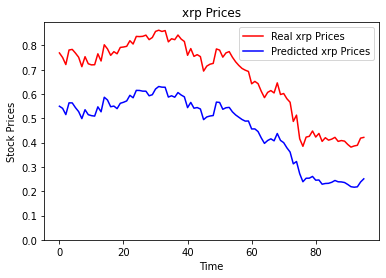

In [6]:
predict_prices = model.predict(x_test)
predict_prices=scala_y.inverse_transform(predict_prices)
y_test=scala_y.inverse_transform(y_test)

plt.plot(y_test, color="red", label=f"Real {stock} Prices")
plt.plot(predict_prices, color="blue", label=f"Predicted {stock} Prices")
plt.title(f"{stock} Prices")
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.ylim(bottom=0)
plt.legend()
plt.show()
plt.close()

In [7]:
mae = mean_absolute_error(predict_prices,y_test)
mape = mean_absolute_percentage_error(predict_prices,y_test)
mse = mean_squared_error(predict_prices,y_test)
r2 = r2_score(predict_prices,y_test)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 0.21
MAPE: 48.27%
MSE: 0.04
RMSE: 0.21
R2: -1.35
